# 0. Setup

### Import packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading data

In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
order_products = pd.read_csv('order_products__prior.csv')

In [3]:
dataset = {'aisles' : aisles, 'departments' : departments, 'orders' : orders, 'products' : products, 'order_products' : order_products}

# 1. Exploratory analysis

Datasets : An anonymized dataset containing a sample of over 3 million grocery orders from more than 200 000 instacart users, published in 2017. Between 4 and 100 of orders are provided per user, with sequence of products purchased in each order.  

In [4]:
# Overview
df_shapes = pd.DataFrame(columns = ['Dataset', 'Row count', 'Col count','Total null count'])
for n, d in dataset.items():
    df_shapes.loc[len(df_shapes)] = [n, d.shape[0], d.shape[1], d.isna().sum().sum()]
df_shapes

,Dataset,Row count,Col count,Total null count
0,aisles,134,2,0
1,departments,21,2,0
2,orders,3421083,7,206209
3,products,49688,4,0
4,order_products,32434489,4,0


### 1.1. `aisles` table

Columns
- aisle_id : unique id
- aisle

In [5]:
# A look at the aisle table
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### 1.2. `departments` table

Columns
- department_id : unique id
- department

In [6]:
# A look at the departments table
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### 1.3. `orders` table

Columns
- order_id : unique id
- user_id
- eval_set : divided the data into 'prior', 'eval', 'train'. Only the last order of a user is categorized as 'eval' or 'train'. 
- order_number : order number of the user
- order_dow : day of week
- order_hour_of_day
- days_since_prior_order


In [7]:
# A look at the orders table
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
# Examine statistics of numerical columns
pd.options.display.float_format = '{:.0f}'.format
orders.drop(columns=['order_id','user_id']).describe()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3421083,3421083,3421083,3214874
mean,17,3,13,11
std,18,2,4,9
min,1,0,0,0
25%,5,1,10,4
50%,11,3,13,7
75%,23,5,16,15
max,100,6,23,30


In [9]:
# Identify number of null values
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [10]:
# Verify if null values in days_since_prior_order are due to first purchases per person
orders.isna().sum().sum() == len(orders.user_id.unique())

True

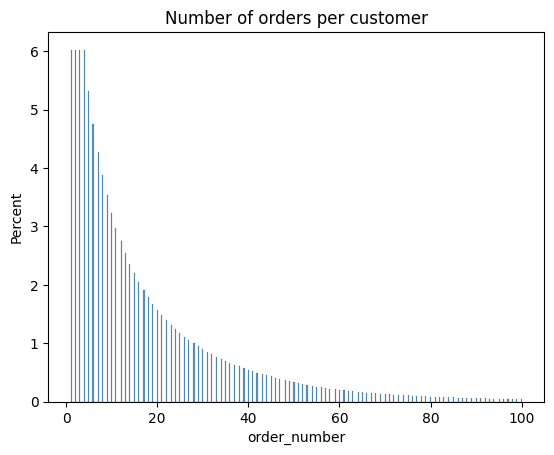

In [11]:
# Display order numbers per customer

fig = plt.figure()

sns.histplot(data = orders,
             x = 'order_number',
             stat = 'percent')
plt.title('Number of orders per customer') ;

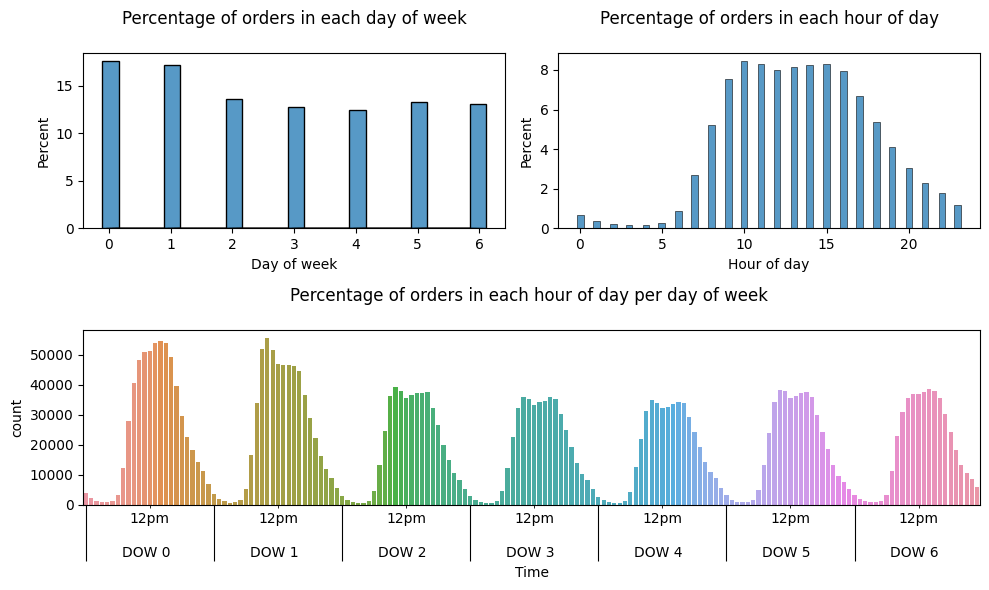

In [12]:
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation

fig = plt.figure(figsize=(10,6))

# ax1 : Percentage of orders in each day of week
ax1 = fig.add_subplot(2,2,1)
sns.histplot(data= orders,
             x = 'order_dow',
             shrink = 5,
             stat = 'percent',
             ax = ax1)
ax1.set_title('Percentage of orders in each day of week\n')
ax1.set_xlabel('Day of week')

# ax2 : Percentage of orders in each hour of day
ax2 = fig.add_subplot(2,2,2)
sns.histplot(data= orders,
             x = 'order_hour_of_day',
             shrink = 5,
             stat = 'percent',
             ax = ax2)
ax2.set_title('Percentage of orders in each hour of day\n')
ax2.set_xlabel('Hour of day')

#ax3 : Percentage of orders in each hour of day per day of week

order_grouped = orders.groupby(['order_dow','order_hour_of_day']).count()['order_id'].reset_index(name = 'count')

ax3 = fig.add_subplot(2,1,2)
sns.barplot(data = order_grouped,
             y= 'count',
             x = order_grouped.index,
             ax = ax3)


ax3.xaxis.set_minor_locator(ticker.MultipleLocator(12))
ax3.xaxis.set_minor_formatter(ticker.FuncFormatter(lambda x, pos: f'12pm' if x % 6 == 0 else ''))

ax3.xaxis.set_major_locator(ticker.MultipleLocator(24))
ax3.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'DOW {int(x/24)}'))
ax3.xaxis.set_tick_params(which='major', pad=-10, length=40)

offset = ScaledTranslation(0.6, 0, fig.dpi_scale_trans)
for label in ax3.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

ax3.set_title('Percentage of orders in each hour of day per day of week \n')
ax3.set_xlabel('Time')

plt.tight_layout()


### 1.4. `products` table

Columns
- product_id : unique id
- product_name
- aisle_id
- department_id

In [13]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<AxesSubplot:xlabel='department'>

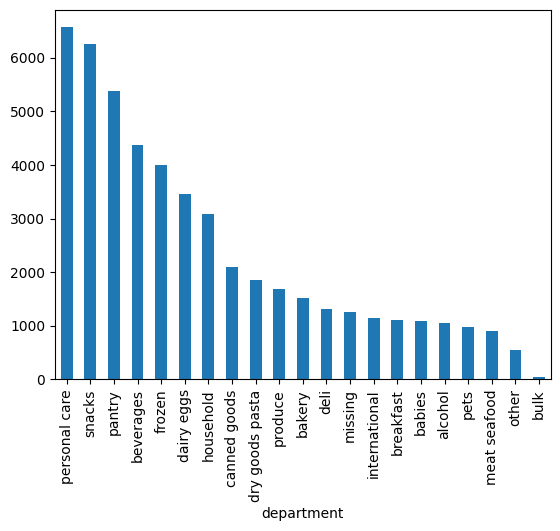

In [14]:
# Distribution of the products per department
product_grouped = products.groupby(['department_id'], as_index=False).agg(count = ('product_id','count'))
product_grouped = product_grouped.join(departments.set_index('department_id'), on = 'department_id')
product_grouped.set_index('department')['count'].sort_values(ascending = False).plot(kind = 'bar')

### 1.5 `order_products` table 

Columns
- order_id : unique id
- product_id
- add_to_cart_order : order of the product_id added to the cart by the customer for a given order_id
- reordered : Was the product ordered before?

In [15]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [16]:
# Which products are frequently reordered?
reorders = order_products.groupby(['product_id'], as_index=False)\
                    .agg(total = ('reordered','count'), reordered = ('reordered','sum')) \
                    .merge(products, on = 'product_id', how = 'left')\
                    .set_index('product_name')[['total','reordered']]

reorders['ordered_once'] = reorders['total']-reorders['reordered']
reorders['reordered_percent'] = reorders['reordered'] / reorders['total']*100
reorders_30 = reorders.loc[reorders['reordered'] != 0].sort_values(by = 'total', ascending = False).head(30)


In [17]:
reorders_30.reset_index().head(10)

,product_name,total,reordered,ordered_once,reordered_percent
0,Banana,472565,398609,73956,84
1,Bag of Organic Bananas,379450,315913,63537,83
2,Organic Strawberries,264683,205845,58838,78
3,Organic Baby Spinach,241921,186884,55037,77
4,Organic Hass Avocado,213584,170131,43453,80
5,Organic Avocado,176815,134044,42771,76
6,Large Lemon,152657,106255,46402,70
7,Strawberries,142951,99802,43149,70
8,Limes,140627,95768,44859,68
9,Organic Whole Milk,137905,114510,23395,83


<AxesSubplot:title={'center':'Top 30 reordered products'}, xlabel='product_name'>

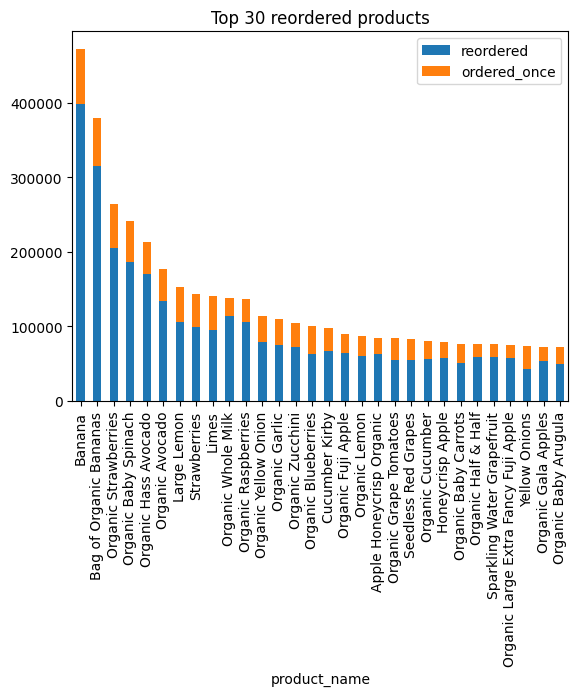

In [18]:
reorders_30.reset_index()[['product_name','reordered','ordered_once']].plot(x = 'product_name', kind = 'bar', stacked = True, title = "Top 30 reordered products")

Most of reordered products are fresh produces 

In [19]:
#On the other hand, what are products that are never reordered?

reorders.sort_values(by = 'reordered_percent').head(20)

,total,reordered,ordered_once,reordered_percent
product_name,,,,
Triple Sec,30,0,30,0
Apple Pie Spice,13,0,13,0
Cilantro Lime Ranch Dressing,7,0,7,0
Variety Pack Tea Sampler,11,0,11,0
"3\"" Palm Wax Pillar Candle",5,0,5,0
Bagged Ice,4,0,4,0
Solar D Gems Vitamin D3 4000 IU,6,0,6,0
Stainless Steel Measuring Cup Set,10,0,10,0
Chocolate Cheesecake Hazelnut,2,0,2,0


In [20]:
print(f"There are {reorders.loc[reorders.reordered_percent == 0].shape[0]} products that are never repurchased, which could indicate consumers' dissatisfaction.\nMore broadly, {reorders.loc[reorders.reordered_percent <10].shape[0]} products are with less than 10% repurchase rate.\nIt would be worth looking into these products, along with other low-repurchase frequency products to reduce offerings to save inventory cost.\nBelow are list of some of the products")

list(reorders.sort_values(by=['reordered_percent','total']).head(20).index)

There are 4372 products that are never repurchased, which could indicate consumers' dissatisfaction.
More broadly, 6266 products are with less than 10% repurchase rate.
It would be worth looking into these products, along with other low-repurchase frequency products to reduce offerings to save inventory cost.
Below are list of some of the products


['All Natural Stevia Liquid Extract Sweetener',
 'Greek Blended Cherry Fat Free Yogurt',
 'Pappardelle Nests Pasta',
 'Fruit Me Up!  Applesauce Pouches',
 'Organic Better Rest Tea Blend',
 'Jamaican Allspice',
 'Organic Veggie Ground',
 'Sleep Aid, Calms Forte, Tablets',
 'Master Blend Ground Coffee',
 'Smooth & Silky Head and Shoulders Smooth & Silky 2-in-1 Dandruff Shampoo + Conditioner 13.5 Fl Oz Female Hair Care',
 'Deep Clean Cleanser & Mask',
 'Chardonnay Carneros',
 'Multigrain Penne Rigate',
 'Spinach Cheese Rice Palak Paneer Dinner',
 '11.3 Oz. Oreo Fudge Creme Double Chocolate',
 'Anjou Pear Hand Soap',
 'Pure Peppermint Extract',
 'Brut Prosecco',
 'String Of Pearl White Sprinkles',
 'Vitamin D Gummies']

# 2. Data merge

Merge tables into one table to use for deeper analysis

In [21]:
# Omitting aisles and departments for now as they contain labels of data
transactions = order_products.merge(orders, on = 'order_id', how = 'left')
transactions = transactions.merge(products.drop(columns = 'product_name'), on = 'product_id', how = 'left')
transactions.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8,86,16
1,2,28985,2,1,202279,prior,3,5,9,8,83,4
2,2,9327,3,0,202279,prior,3,5,9,8,104,13
3,2,45918,4,1,202279,prior,3,5,9,8,19,13
4,2,30035,5,0,202279,prior,3,5,9,8,17,13


In [22]:
# Check for null values
transactions.isna().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
aisle_id                        0
department_id                   0
dtype: int64

## 2.1. Never ordered products

In [23]:
order_count = transactions.groupby('product_id')\
                          .agg(count = ('order_id', 'count'))\
                          .reindex(np.arange(products.product_id.min(), products.product_id.max()+1), fill_value = 0)
order_count.loc[order_count['count'] == 0].merge(products[['product_id','product_name']], on = 'product_id', how = 'left')

,product_id,count,product_name
0,3630,0,Protein Granola Apple Crisp
1,3718,0,Wasabi Cheddar Spreadable Cheese
2,7045,0,Unpeeled Apricot Halves in Heavy Syrup
3,25383,0,Chocolate Go Bites
4,27499,0,Non-Dairy Coconut Seven Layer Bar
5,36233,0,Water With Electrolytes
6,37703,0,Ultra Sun Blossom Liquid 90 loads Fabric Enhan...
7,43725,0,Sweetart Jelly Beans
8,45971,0,12 Inch Taper Candle White
9,46625,0,Single Barrel Kentucky Straight Bourbon Whiskey


Could consider removing these products from the product catelogue to reduce the inventory cost. 

## 2.2. Product reorder cycles

In [24]:
purchase_frequency = transactions.dropna().groupby(['product_id']).agg(total_purchases = ('order_id','count'),
                                         days = ('days_since_prior_order', 'mean')).merge(products[['product_id','product_name']], on = 'product_id', how = 'left').dropna().sort_values(by = 'days')
# Rounding up the days to avoid having 0 day interval
purchase_frequency['days'] = np.ceil(purchase_frequency['days'])
purchase_frequency.loc[purchase_frequency.total_purchases > 1].sort_values(['days','total_purchases'])

,product_id,total_purchases,days,product_name
38392,38421,2,1,7 Year Bourbon
27612,27633,5,1,Pomegranate Energy Shot
34326,34352,2,2,Chinese Barbecue Sauce
43466,43501,2,2,Thyme & Honey Goat Cheese
32152,32176,2,2,10 Grain Bread Mix
...,...,...,...,...
42651,42685,3,30,Class Baby Powder
18064,18076,3,30,Orange Peach Mango Juice
41758,41790,3,30,Peppermint Schnapps Liqueur
41692,41724,3,30,Cacao Crunch Bar


The result may not be adequate to generalize, as there are few purchase data for each product, usually from 1-2 customers who ordered once or twice. 

## 2.3 Splitting the orders into single product purchases and multiple product purchases

In [25]:
# Identifying purchases with only one item
order_product = transactions.groupby(['order_id']).agg(product_count = ('product_id','count'))
transactions = transactions.merge(order_product, on = 'order_id', how = 'left')

transactions_single = transactions.loc[transactions['product_count'] == 1]
transactions_multiple = transactions.loc[transactions['product_count'] > 1]

In [26]:
# Top 20 single-purchased products
pd.DataFrame(transactions_single.product_id).merge(products[['product_id','product_name']], on = 'product_id', how = 'left').product_name.value_counts().head(20)

Bag of Organic Bananas             2774
Soda                               2604
Spring Water                       2065
Banana                             2047
Organic Baby Spinach               1166
Organic Strawberries               1120
Strawberries                       1018
Clementines                         988
Organic Whole Milk                  988
Smartwater                          938
Hass Avocados                       918
Organic Half & Half                 917
Sparkling Mineral Water             878
Sparkling Water                     865
Natural Spring Water                856
Drinking Water                      820
0% Greek Strained Yogurt            803
Raspberries                         717
Organic Hass Avocado                697
Sparkling Natural Mineral Water     686
Name: product_name, dtype: int64

# 3. Market Basket Analysis 

Market Basket Analysis refers to a type of affinity analysis, which is a data mining method for discovering meaningful co-occurences between different entities in a data set. In the context of Market Basket Analysis, the focus is on analyzing products that are commonly purchased together. By examining the correlation between the products, businesses can seek to optimize product placement, design more effective cross-selling strategies, or offer more impactful product suggestions. 

The likelihood of co-occurences of purchases are uncovered by using association rules. Apriori algorithm is one of the most popular methods for mining the association rules in a dataset.  


## 3.1. Data preparation

In [27]:
purchases = transactions_multiple[['order_id','product_id','aisle_id','order_hour_of_day']].merge(products[['product_id','product_name']], on = 'product_id', how = 'left')
purchases.head()

,order_id,product_id,aisle_id,order_hour_of_day,product_name
0,2,33120,86,9,Organic Egg Whites
1,2,28985,83,9,Michigan Organic Kale
2,2,9327,104,9,Garlic Powder
3,2,45918,19,9,Coconut Butter
4,2,30035,17,9,Natural Sweetener


In [28]:
# Using groups of purchases with product names for easier identification
product_list = (purchases.groupby(['order_hour_of_day','order_id'])['product_name']
                         .agg(lambda x: list(x))
                         .reset_index()
                         .rename(columns={'product_name':'purchase_list'})
                         .dropna())
product_list.head()

,order_hour_of_day,order_id,purchase_list
0,0,30,"[Synergy Organic Kombucha Gingerberry, Mango C..."
1,0,47,"[Strawberries, Organic Blueberries, Raspberrie..."
2,0,48,"[Organic Chicken Bone Broth, Yo Baby Organic W..."
3,0,361,"[Green Peas, Frozen Broccoli Florets, Garlic, ..."
4,0,445,"[Raw Shrimp, Fresh Cut Butternut Squash]"


In [29]:
# Converting series into nested list
def series_to_list(df):
    rules = df.purchase_list.tolist()
    for i in range(len(rules)):
        rules[i] = list(map(str,rules[i]))
    return rules

rules_product = series_to_list(product_list)

print(f'Total number of purchase groups : {len(rules_product)}')
rules_product[:3]

Total number of purchase groups : 3058126


[['Synergy Organic Kombucha Gingerberry',
  'Mango Chunks',
  'Organic Unsweetened Soy Milk Beverage'],
 ['Strawberries',
  'Organic Blueberries',
  'Raspberries',
  'Beef Franks',
  'Golden Pineapple'],
 ['Organic Chicken Bone Broth',
  'Yo Baby Organic Whole Milk Banana Mango Yogurt',
  'YoKids Squeezers Organic Low-Fat Yogurt, Strawberry',
  'Low Sodium Beef Broth',
  'Organic Unrefined Toasted Sesame Oil',
  'Gluten-Free Chicken Nuggets',
  'Original Barbeque Sauce',
  'Milk, Vitamin D']]

## 3.2. Apriori performance comparison

In [30]:
# Running performance test with 1% of dataset
rules_product_test = rules_product[:int(len(rules_product)*0.01)]
len(rules_product_test)

30581

In [31]:
# Initializing a dictionary to store the results
import datetime

results = {}

### 3.2.1. mlxtend

In [32]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

start_time = datetime.datetime.now()
# Data formatting
te = TransactionEncoder()
te_ary = te.fit(rules_product_test).transform(rules_product_test)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Running apriori
apriori(df, min_support=0.6)
end_time = datetime.datetime.now()

results['mlxtend'] = (end_time - start_time).microseconds

### 3.2.2. efficient-apriori

In [33]:
from efficient_apriori import apriori

start_time = datetime.datetime.now()
itemsets, rules = apriori(rules_product_test, min_support=0.6)
end_time = datetime.datetime.now()

results['efficient_apriori'] = (end_time - start_time).microseconds

### 3.2.3. pyFIM

In [34]:
from fim import arules

start_time = datetime.datetime.now()
result = arules(rules_product_test, supp=0.6)
end_time = datetime.datetime.now()

results['pyFIM'] = (end_time - start_time).microseconds

In [35]:
results_time = pd.DataFrame(results.values(), index = results.keys(), columns = ['time_microseconds'])
results_time

,time_microseconds
mlxtend,637838
efficient_apriori,122149
pyFIM,52315


In [36]:
print(f"Based on Market Basket Analysis on 1% of the dataset, pyFIM is {round(results['mlxtend']/results['pyFIM'],2)}x faster than mlxtend, and {round(results['efficient_apriori']/results['pyFIM'],2)}x faster than efficient_apriori")

Based on Market Basket Analysis on 1% of the dataset, pyFIM is 12.19x faster than mlxtend, and 2.33x faster than efficient_apriori


## 3.3. Analysis on the whole dataset

Continuing with pyFIM to conduct Market Basket Analysis. Support and confidence are two key metrics in identifying co-occurence of items.  
- Support : how frequently a set of items appears in the dataset. 
- Confidence : how often consequent items appear in transactions that contain antecedent items. 

For example, when {Eggs, Flour} set has a support of 10% and confidence of 50% for {Eggs} -> {Flour}, the set appears in 10% of the purchases, with 50% of purchases with Eggs also contain Flour. 

In [37]:
supp = 0.1
conf = 30
report = 'aSC'

result_list = arules(rules_product, supp=supp, conf=conf, report=report, zmin=2, zmax = 2)

In [38]:
def apriori_format(result_list : list):

    report_colnames = {
    'a': 'support_itemset_absolute',
    's': 'support_itemset_relative',
    'S': 'support_itemset_relative_pct',
    'b': 'support_bodyset_absolute',
    'x': 'support_bodyset_relative',
    'X': 'support_bodyset_relative_pct',
    'h': 'support_headitem_absolute',
    'y': 'support_headitem_relative',
    'Y': 'support_headitem_relative_pct',
    'c': 'confidence',
    'C': 'confidence_pct',
    'l': 'lift',
    'L': 'lift_pct',
    'e': 'evaluation',
    'E': 'evaluation_pct',
    'Q': 'support_emptyset',
    }

    colnames = ['consequent', 'antecedent'] + [report_colnames.get(k, k) for k in list(report)]
    df = pd.DataFrame(result_list, columns=colnames)
    df['antecedent'] = df['antecedent'].map(lambda x: x[0])
    df = df.sort_values('support_itemset_absolute', ascending=False)
    return df

In [39]:
# Show 10 frequent purchase combinations
df_result = apriori_format(result_list)
print(df_result.shape)
df_result.head(10)

(188, 5)


,consequent,antecedent,support_itemset_absolute,support_itemset_relative_pct,confidence_pct
0,Banana,Organic Avocado,53395,2,30
2,Banana,Organic Fuji Apple,33943,1,38
1,Banana,Cucumber Kirby,32097,1,33
3,Banana,Honeycrisp Apple,28408,1,36
4,Bag of Organic Bananas,Organic Large Extra Fancy Fuji Apple,23364,1,31
5,Bag of Organic Bananas,Organic D'Anjou Pears,14905,0,31
6,Bag of Organic Bananas,Organic Navel Orange,14019,0,33
7,Banana,Broccoli Crown,13842,0,33
9,Banana,Bartlett Pears,13682,0,39
8,Banana,"Clementines, Bag",12406,0,31


### 3.3.1 Deciding on the parameter

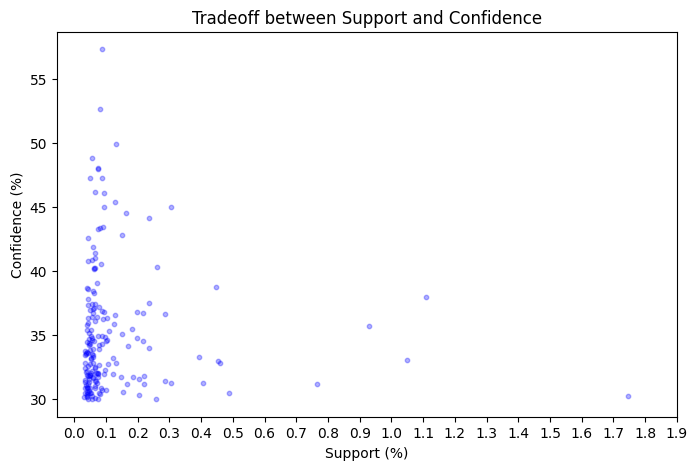

In [40]:
import numpy as np
def apriori_mapping(df_result):
    # Extracting the support and confidence
    support = df_result['support_itemset_relative_pct']
    confidence = df_result['confidence_pct']

    # Creating the plot
    fig  =plt.figure(figsize=(8, 5))

    ax = fig.add_subplot(111)
    ax.scatter(support, confidence, color='blue', alpha=0.3, s = 10)  # Scatter plot

    ax.set_title('Tradeoff between Support and Confidence')
    ax.set_xlabel('Support (%)')
    ax.set_ylabel('Confidence (%)')
    #ax.xaxis.set_major_locator(ticker.FixedLocator())

    ax.set_xticks(np.arange(0,2,0.10))

    # Show the plot
    plt.show()

apriori_mapping(df_result)

### 3.3.2 Visualizing the network

In [41]:
from pyvis import network as net
import networkx as nx

G = nx.from_pandas_edgelist(df, source='antecedent', target='consequent',
                            edge_attr='support_itemset_relative_pct')

/home/kwonowk/.pyenv/versions/lewagon/lib/python3.10/site-packages/astroid/node_classes.py:94: DeprecationWarning: The 'astroid.node_classes' module is deprecated and will be replaced by 'astroid.nodes' in astroid 3.0.0
  warnings.warn(


NetworkXError: Invalid edge_attr argument: support_itemset_relative_pct

In [ ]:
from pyvis import network as net
import networkx as nx

mba_net = net.Network(notebook = True, cdn_resources='in_line',
                      height="1000px",
                      width="100%",
                      font_color="black")

mba_net.barnes_hut()

sources = df.antecedent
targets = df.consequent
weights = df.confidence_pct

edge_data = zip(sources, targets, weights)

for e in edge_data:
                src = e[0]
                dst = e[1]
                w = e[2]

                mba_net.add_node(src, src, title=src)
                mba_net.add_node(dst, dst, title=dst)
                mba_net.add_edge(src, dst, value=w)

neighbor_map = mba_net.get_adj_list()

nx.set_node_attributes(mba_net,df.support_itemset_relative_pct*10,'size')

# add neighbor data to node hover data
for node in mba_net.nodes:
                node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
                node["value"] = len(neighbor_map[node["id"]])
                node["font"] = {'size' : 100}


mba_net.save_graph('product_network.html')


## 3.4 Top 3 purchase groups each hour

In [44]:
df_result_hour = pd.DataFrame({'consequent':[],
                               'antecedent': [],
                               'support_itemset_absolute': [],
                               'support_itemset_relative_pct': [],
                               'confidence_pct': [],
                               'hour':[]})

def format_hour(hour):
    """Convert 24-hour format into 12-hour format"""
    if (hour == 0) or (hour == 24):
        return "12am"
    elif hour == 12:
        return "12pm"
    elif hour < 12:
        return f"{hour}am"
    else:
        return f"{hour - 12}pm"

for hour in range(0,24):

    temp = series_to_list(product_list.loc[product_list['order_hour_of_day'] == hour])

    temp_result_list = arules(temp, supp=0.05, conf=50, report=report, zmin=2, zmax=2)
    temp_result = apriori_format(temp_result_list)
    temp_result['hour'] = hour
    df_result_hour = pd.concat([df_result_hour, temp_result])

    print(f" Top 3 purchases between {format_hour(hour)} ~ {format_hour((hour+1))} ".center(95, '='))


    for index, row in temp_result[:3].iterrows():
        print(f"Associated items rule {row['antecedent']} -> {row['consequent']}  \nFrequency : {row['support_itemset_relative_pct']:.2f} % | Confidence : {row['confidence_pct']:.2f} %\n")

============================== Top 3 purchases between 12am ~ 1am =============================
Associated items rule Coconut Chia Bar -> Chocolate Peanut Butter  
Frequency : 0.11 % | Confidence : 53.49 %

Associated items rule Peanut Butter Creamy With Salt -> Banana  
Frequency : 0.11 % | Confidence : 54.76 %

Associated items rule Chocolate Peanut Butter -> Coconut Chia Bar  
Frequency : 0.11 % | Confidence : 52.27 %

============================== Top 3 purchases between 1am ~ 2am ==============================
Associated items rule Total 2% Lowfat Greek Strained Yogurt With Blueberry -> Total 2% with Strawberry Lowfat Greek Strained Yogurt  
Frequency : 0.22 % | Confidence : 54.55 %

Associated items rule Non Fat Acai & Mixed Berries Yogurt -> Icelandic Style Skyr Blueberry Non-fat Yogurt  
Frequency : 0.14 % | Confidence : 55.56 %

Associated items rule Go Lean Cereal -> Banana  
Frequency : 0.12 % | Confidence : 59.09 %

============================== Top 3 purchases between 2a

# 4. Exporting results

In [45]:
df_result.to_csv('q1-1.csv', index = False)
df_result_hour.to_csv('q1-2.csv', index = False)

order_grouped.to_csv('q2-1.csv', index = False)
reorders.to_csv('q2-2.csv', index = False)
purchase_frequency.to_csv('q2-3.csv', index = False)

transactions_single.to_csv('q3-1.csv', index = False)
order_count.to_csv('q3-2.csv', index = False)